###### Content under Creative Commons Attribution license CC-BY 4.0, code under BSD 3-Clause License © 2018 parts of this notebook are from ([this Jupyter notebook](https://nbviewer.jupyter.org/github/krischer/seismo_live/blob/master/notebooks/Computational%20Seismology/Wave%20Propagation%20%26%20Analytical%20Solutions/Greens_function_acoustic_1-3D.ipynb)) by Kristina Garina, Ashim Rijal and Heiner Igel ([@heinerigel](https://github.com/heinerigel)) which is a supplemenatry material to the book [Computational Seismology: A Practical Introduction](http://www.computational-seismology.org/),  additional modifications by D. Koehn, notebook style sheet by L.A. Barba, N.C. Clementi

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())

# Computation of Green's functions and seismograms for the acoustic wave equation

In the previous lessons we derived the equations of motion to describe wave propagation in 3D, 2D and 1D elastic and acoustic media. Before solving the underlying partial differential equations numerically using finite-differences (FD), we should estimate some analytical solutions. 

This is not only useful to check if the FD codes contain any bugs, but also to get an idea of the accuracy of the numerical solution compared to the analytical.

## 1D Green's function  


Let's start with a simple problem, like the equations of motion for a **1D acoustic medium** assuming a constant density model, which we derived in [Lesson 3](http://nbviewer.jupyter.org/github/daniel-koehn/Theory-of-seismic-waves-II/blob/master/01_Analytical_solutions/3_Acoustic_medium.ipynb) and [4](http://nbviewer.jupyter.org/github/daniel-koehn/Theory-of-seismic-waves-II/blob/master/01_Analytical_solutions/4_2D_1D_elastic_acoustic_approx.ipynb):

\begin{equation}
\frac{\partial^2 P}{\partial t^2} - V_p^2\frac{\partial^2 P}{\partial x^2} = f\nonumber
\end{equation}

If we introduce the **Dirac delta function**

$$
\delta(x) = \left\{
\begin{array}{ll}
	\infty &x=0 \\
	0 &x\neq 0 	
\end{array}
\right.
$$

with the normalization condition 

$$
\int_{-\infty}^{\infty} \delta(x)\; dx = 1
$$

and property 

$$
\int_{-\infty}^{\infty} \delta(x-x_0)\; f(x)\; dx = f(x_0)
$$

as a source term of the acoustic wave equation:

\begin{equation}
f = \delta(t-t_s) \delta(x-x_s) \nonumber
\end{equation}

we call the solution of the 1D wave equation

\begin{equation}
\frac{\partial^2 G_1}{\partial t^2} - V_p^2 \frac{\partial^2 G_1}{\partial x^2} = \delta(t-t_s) \delta(x-x_s)
\end{equation}

**Green's function** $\mathbf{G_1(x,t;x_s,t_s)}$. This means that we place a source at $x = x_s$. The **source time function** describes the time-dependent behaviour of the source. In this case the source time function has an amplitude of $1\; \frac{Pa}{s^2}$ only at time $t = t_s$, otherwise the amplitude is zero. The pressure wavefield is recored at the receiver position x and time t.

In the following derivation of the Green's function, we assume the special case of a source located at $x_s = 0\; m$ and a source time $t_s = 0\; s$, which simplifies eq. (1) to 

\begin{equation}
\frac{\partial^2 G_1}{\partial t^2} - V_p^2 \frac{\partial^2 G_1}{\partial x^2} = \delta(t) \delta(x)
\end{equation}

Furthermore, the P-wave velocity distribution in the sub-surface is constant:

\begin{equation}
V_p(x) = V_{p0} = const. \nonumber
\end{equation}

The Green's function can be calculated using different approaches. We try to find a solution in the Fourier domain. First, we apply a temporal **Fourier transform** 

\begin{equation}
\hat{f}(\omega) = \frac{1}{2\pi}\int_{-\infty}^{\infty} f(t) e^{-i\omega t} dt\nonumber
\end{equation}

where $\omega$ denotes the angular frequency, to eq. (2):

\begin{equation}
\frac{1}{2 \pi} \int_{-\infty}^{\infty}\biggl\{\frac{\partial^2 G_1(x,t)}{\partial t^2} - V_{p0}^2\frac{\partial^2 G_1(x,t)}{\partial x^2}\biggl\} e^{-i\omega t} dt = \frac{1}{2 \pi} \int_{-\infty}^{\infty}\delta(t) \delta(x) e^{-i\omega t} dt \nonumber
\end{equation}

Using the properties:

\begin{equation}
\frac{1}{2 \pi} \int_{-\infty}^{\infty}\biggl\{\frac{\partial^2 G_1}{\partial t^2}\biggl\} e^{-i\omega t} dt = -\omega^2 \hat{G}_1(x,\omega) \nonumber
\end{equation}

and

\begin{equation}
\frac{1}{2 \pi} \int_{-\infty}^{\infty}\delta(t) e^{-i\omega t} dt = \frac{1}{2 \pi} e^{-i\omega 0} = \frac{1}{2 \pi}\nonumber
\end{equation}

we can get rid of the 2nd time-derivative on the LHS and the time-dependent $\delta$ function on the RHS:

\begin{equation}
-\omega^2 \hat{G}_1(x,\omega) - V_{p0}^2\frac{\partial^2 \hat{G}_1(x,\omega)}{\partial x^2} = \frac{1}{2 \pi} \delta(x)
\end{equation}

Next, we apply a spatial Fourier transform

\begin{equation}
\hat{f}(k) = \frac{1}{2\pi}\int_{-\infty}^{\infty} f(x) e^{-ikx} dx,\nonumber
\end{equation}

where $k$ denotes the wavenumber, to eq. (3):

\begin{equation}
\frac{1}{2 \pi} \int_{-\infty}^{\infty}\biggl\{-\omega^2\hat{G}_1(x,\omega) - V_{p0}^2\frac{\partial^2 \hat{G}_1(x,\omega)}{\partial x^2}\biggr\} e^{-ikx} dx = \frac{1}{4 \pi^2}\int_{-\infty}^{\infty}\delta(x) e^{-ikx} dx\nonumber
\end{equation}

and using the same properties as for the temporal Fourier transform, we get:

\begin{equation}
-\omega^2 \hat{G}_1(k,\omega) + k^2 V_{p0}^2 \hat{G}_1(k,\omega) = \frac{1}{4 \pi^2}\nonumber
\end{equation}

Solving for $\hat{G}_1(k,\omega)$:

\begin{equation}
\hat{G}_1(k,\omega) = \frac{1}{4 \pi^2} \frac{1}{V_{p0}^2 k^2 - \omega^2} = \frac{1}{4 \pi^2 V_{p0}^2} \frac{1}{k^2 - \frac{\omega^2}{V_{p0}^2}}
\end{equation}

we have derived the **Green's function solution for the 1D acoustic wave equation in the frequency-wavenumber domain**.

To get the time-domain solution, we first apply the inverse spatial Fourier transform to eq. (4)

\begin{equation}
\hat{G}_1(x,\omega) = \frac{1}{4 \pi^2 V_{p0}^2}\int_{-\infty}^{\infty} \frac{e^{ikx}}{k^2 - \frac{\omega^2}{V_{p0}^2}}dk \notag
\end{equation}

This integral has two poles at $k = \pm \frac{\omega}{V_p}$, so we have to integrate along a contour around the poles. For further details, I refer to my extended lecture notes on the [Transformation of an analytical solution of the 1D acoustic
wave equation for a homogeneous, unbounded medium from
$(\omega, k)$ to $(t, x)$ domain](https://github.com/daniel-koehn/Theory-of-seismic-waves-II/tree/master/01_Analytical_solutions/1D_Green_wk_2_tx_domain.pdf)

The result is the solution in the **frequency-space domain**:

\begin{equation}
\hat{G}_1(x,\omega) =  \frac{e^{-i\omega|x|/V_{p0}}}{4 \pi i V_{p0} \omega}. \nonumber
\end{equation}

This will become useful to test the accuracy of our frequency domain finite-difference codes, which we will develop later in the lecture. For the transformation to time-domain we have to integrate around the pole at $\omega=0$:

\begin{equation}
\hat{G}_1(x,t) =  \frac{1}{4 \pi i V_{p0}}\int_{-\infty}^{\infty}\frac{e^{i\omega(t-|x|/V_{p0})}}{\omega} d\omega. \nonumber
\end{equation}

This finally leads to the Green's function for the 1D homogeneous acoustic problem:

\begin{equation}
G_1(x,t)=\dfrac{1}{2V_{p0}}H\biggl(t-\dfrac{|x|}{V_{p0}}\biggr),\nonumber
\end{equation}

where $H$ denotes the **Heaviside function**:

$$
H(x) = \left\{
\begin{array}{ll}
	0 &x<0 \\
	1 &x\geq 0 	
\end{array}
\right.
$$

More generally, we can replace:

\begin{align}
x &\rightarrow x - x_s,\nonumber\\
t &\rightarrow t - t_s,\nonumber\\
\end{align}

and get:

\begin{equation}
G_1(x,t)=\dfrac{1}{2V_{p0}}H\biggl((t-t_s)-\dfrac{|x-x_s|}{V_{p0}}\biggr),\nonumber
\end{equation}

So the 1D Green's function is a Heaviside function delayed by the traveltime between source and receiver. Note also that the absolute value of the offset $|x-x_s|$ implies that we have a wave propagating to the left and one propagating to the right. Let's plot the 1D Green's function.

In [2]:
# Import Libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define parameters
vp0 = 1.        # velocity m/s 
r = 2.          # distance from source
tmax = 5.       # length of seismogram (s)
nt = 3000       # number of time samples
dt = tmax/nt    # time increment
ts = 0          # source time


# Acquisition geometry
xs=0            # coordinates of source
ys=0
zs=0

xr=r            # coordinates of receiver
yr=0
zr=0

In [4]:
# Define time vector
time = np.arange(0,tmax,dt)

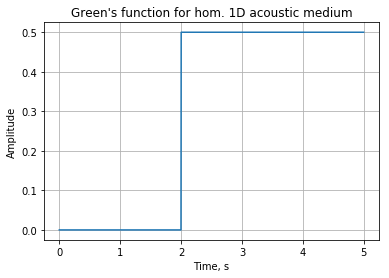

In [5]:
# Calculating Green's function in 1D

G1=np.zeros(nt)      # initialization G with zeros

for i in range (nt):
    if (((time[i]-ts)-abs(xr-xs)/vp0)>=0):
        G1[i]=1./(2*vp0)
    else:
        G1[i]=0

# Plotting Green's function in 1D
plt.plot(time, G1)
plt.title("Green's function for hom. 1D acoustic medium" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

## 2D Green's function  

Using the same approach as for the 1D medium, we can calculate the **2D Green's function** $\mathbf{G_2(x,t;x_s,t_s)}$, which is governed by

\begin{equation}
\frac{\partial^2 G_2}{\partial t^2} - V_{p0}^2 \biggl(\frac{\partial^2 G_2}{\partial x^2} + \frac{\partial^2 G_2}{\partial z^2} \biggl)= \delta(t-t_s) \delta(x-x_s) \delta(z-z_s) \nonumber
\end{equation}

as 

\begin{equation}
G_2(x,z,t) = \dfrac{1}{2\pi V_{p0}^2}\dfrac{H\biggl((t-t_s)-\dfrac{|r|}{V_{p0}}\biggr)}{\sqrt{(t-t_s)^2-\dfrac{r^2}{V_{p0}^2}}} \nonumber 
\end{equation}

with the source-receiver distance (offset)

$r = \sqrt{(x-x_s)^2+(z-z_s)^2}$

Compared to the 1D Green's function, we have a damped Heaviside function due to the radiation characteristic of the infinite line source, introduced by the 2D approximation. Let's also plot the 2D Green's function.

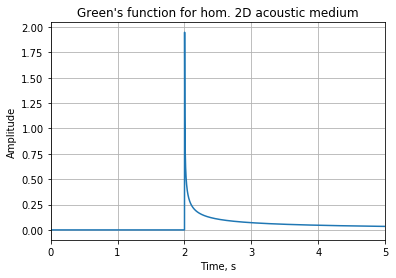

In [6]:
# Calculation of 2D Green's function

G2=np.zeros(nt)                    # initialization G with zeros
r=np.sqrt((xs-xr)**2+(ys-yr)**2)

for i in range (nt):
    if (((time[i]-ts)-abs(r)/vp0)>0):
        G2[i]=(1./(2*np.pi*vp0**2))*(1./np.sqrt((time[i]-ts)**2-(r**2/vp0**2)))
    else:
        G2[i]=0
           
# Plotting Green's function in 2D
plt.plot(time, G2)
plt.title("Green's function for hom. 2D acoustic medium" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.xlim((0, tmax))
plt.grid()
plt.show()

## 3D Green's function  

Finally, we can calculate the **3D Green's function** $\mathbf{G_3(x,t;x_s,t_s)}$, which is governed by

\begin{equation}
\frac{\partial^2 G_3}{\partial t^2} - V_{p0}^2 \biggl(\frac{\partial^2 G_3}{\partial x^2} + \frac{\partial^2 G_3}{\partial y^2} +\frac{\partial^2 G_3}{\partial z^2} \biggl)= \delta(t-t_s) \delta(x-x_s) \delta(y-y_s) \delta(z-z_s) \nonumber
\end{equation}

as 

\begin{equation}
G_3(x,y,z,t) = \dfrac{1}{4 \pi V_{p0}^2 r}\delta\biggl((t-t_s)-\frac{r}{V_{p0}}\biggr) \nonumber 
\end{equation}

with the source-receiver distance (offset)

$r = \sqrt{(x-x_s)^2+(y-y_s)^2+(z-z_s)^2}$

So the 3D Green's function for the homogeneous acoustic medium is a Delta distribution delayed by the traveltime between source and receiver. For the computation of the 3D Green's function, we have to approximate the  $\delta-$function. An example is the boxcar function

$$
\delta_{bc}(x) = \left\{
\begin{array}{ll}
	1/dx &|x|\leq dx/2 \\
	0 &\text{elsewhere} 	
\end{array}
\right.
$$

fulfilling the properties of the $\delta$ function as  $dx \rightarrow\; 0$. This function is used to properly scale the source term to obtain correct absolute amplitudes.

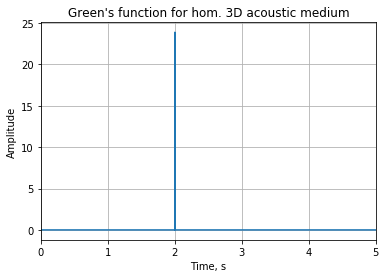

In [7]:
# Calculation of 3D Green's function

G3=np.zeros(nt)                                # initialization G with zeros

r=np.sqrt((xs-xr)**2+(ys-yr)**2+(zs-zr)**2)    # defining offset
amp=1./(4*np.pi*(vp0**2)*r)                    # defining amplitudes
t_arr=ts+(r/vp0)                               # time arrival
i_arr=t_arr/dt
b=int(i_arr)
G3[b]= amp/dt

# Plotting Green's function in 3D
plt.plot(time, G3)
plt.title("Green's function for hom. 3D acoustic medium" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.xlim((0, tmax))
plt.grid()
plt.show()

##### Exercise

Derive the Green's function solutions of the 2D elastic SH problem:

\begin{align}
\rho\frac{\partial^2 u_y}{\partial t^2} - \frac{\partial}{\partial x} \mu \frac{\partial u_y}{\partial x} - \frac{\partial}{\partial z} \mu \frac{\partial u_y}{\partial z} &= f_y\nonumber \\
\end{align}

and 1D elastic SH problem:

\begin{align}
\rho\frac{\partial^2 u_y}{\partial t^2} - \frac{\partial}{\partial x} \mu \frac{\partial u_y}{\partial x} &= f_y.\nonumber \\
\end{align}

Assume a constant distribution of the shear modulus $\mu(x,z) = \mu_0 =  const. \neq 0\; Pa$ and density $\rho(x,z) = \rho_0 = const. \neq 0\; \frac{kg}{m^3}$ in the subsurface.

*Hint: To solve this problem, you do not have to apply any Fourier transform or integrate along contours around poles*

## Computation of seismograms

In field data applications we can not excitate a source time function like a delta distribution, which would have a perfect white spectrum (all frequencies are excitated at once). As we will see later, some numerical problems arise when explicitly calculating Green's function with the time-domain finite-difference approach. 

Instead we have to rely on band-limited source signals. Seismograms for an arbritary source wavelet can be computed from the the Green's function. In the following example, the source wavelet consists of the first derivative of the Gaussian.

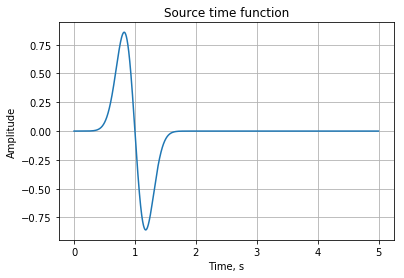

In [8]:
# Defining source time function
f0 = 1           # Frequency (Hz)
p=1./f0          # period
t0 = p/dt        # defining t0
sigma=4./p      

# Initialization of source-time function
src=np.zeros(nt) 
source=np.zeros(nt)

# Initialization of first derivative of gaussian
for it in range(nt):
    t=(it-t0)*dt
    src[it]=-2*sigma*t*np.exp(-(sigma*t)**2)
source[0:nt]=src

# Plotting of source time function
plt.plot(time, src)
plt.title('Source time function')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

##### Excerise

Compute seismograms $G_{seis}(x,t)$ for the 1D, 2D and 3D acoustic media, by a convolution of the Green's function $G(x,t;x_s,t_s)$ with the source wavelet $s(t)$:

$$G_{seis}(x,t) = G(x,t;x_s,t_s) * s(t)$$

Plot the resulting seismograms together with the Green's function solutions.

*Hints:* 
* Use the NumPy function np.convolve. 
* How could you check if your implemented convolution is correct?

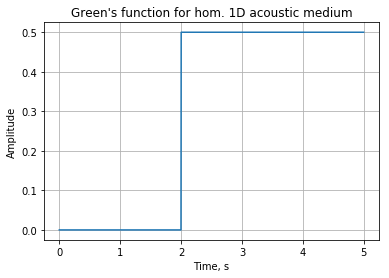

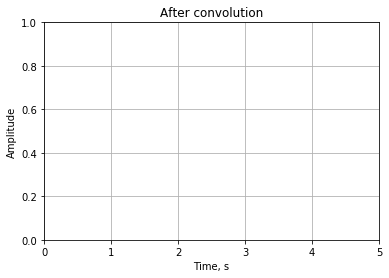

In [9]:
# Computation of 1D seismogram

# Convolution of Green's function with the 1st derivative of a Gaussian
# COMPUTE YOUR SEISMOGRAM HERE!
#G1_seis=

# Plotting Green's function in 1D
plt.plot(time, G1)
plt.title("Green's function for hom. 1D acoustic medium" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# Plotting convolved Green's function in 1D
# PLOT YOUR SEISMOGRAM HERE!
# plt.plot()
plt.title('After convolution')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.xlim (0, tmax)
plt.grid()
plt.show()

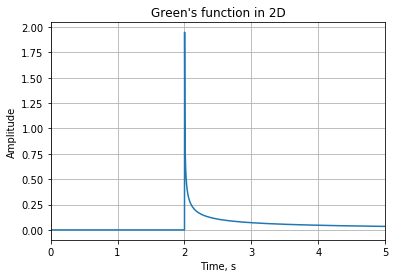

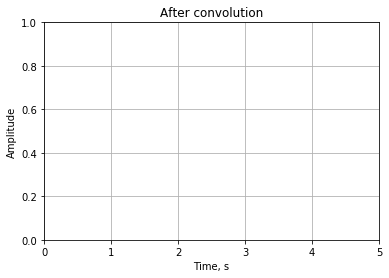

In [10]:
# Convolution of Green's function with the 1st derivative of a Gaussian
# COMPUTE YOUR SEISMOGRAM HERE!
#G2_seis=

# Plotting Green's function in 2D
plt.plot(time, G2)
plt.title("Green's function in 2D" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.xlim((0, tmax))
plt.grid()
plt.show()

# Plotting convolved Green's function in 1D
# PLOT YOUR SEISMOGRAM HERE!
# plt.plot()
plt.title('After convolution')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.xlim((0, tmax))
plt.grid()

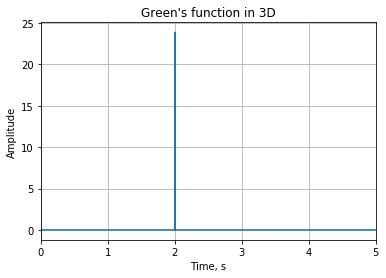

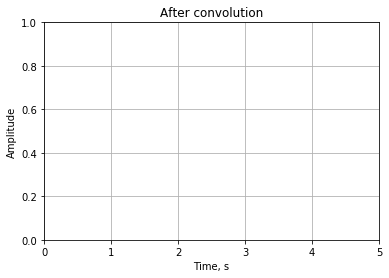

In [11]:
# Convolution of Green's function with the 1st derivative of a Gaussian
# COMPUTE YOUR SEISMOGRAM HERE!
#G3_seis =

# Plotting Green's function in 3D
plt.plot(time, G3)
plt.title("Green's function in 3D" )
plt.xlabel("Time, s")
plt.ylabel("Amplitude")
plt.xlim((0, tmax))
plt.grid()
plt.show()

# Plotting convolved Green's function in 1D
# PLOT YOUR SEISMOGRAM HERE!
# plt.plot()
plt.title('After convolution')
plt.xlabel('Time, s')
plt.ylabel('Amplitude')
plt.xlim (0, tmax)
plt.grid()
plt.show()

## We learned:

* Calculation of analytical Green's function in the 1D, 2D, and 3D cases
* How to define a source time function
* Convolution of Green's function with source time function